In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes

In [2]:
def get_full_df(input_path: str):
    def get_years_dfs():
        excel_file = pd.ExcelFile(input_path)
        
        for sheet in excel_file.sheet_names:
            if not "_proportion" in sheet:
                continue

            df = pd.read_excel(excel_file, sheet_name=sheet)
            yield df
    
    return pd.concat(get_years_dfs())

In [3]:
def plot_and_save_for_years(df: pd.DataFrame, title: str, save_path: str):
    grouped_by_year = df.groupby("year")
    values_per_year = dict((year, list(grouped_by_year.get_group(year)["proportion_quote_words_to_total_words"])) for year in grouped_by_year.groups)

    years = list(values_per_year.keys())
    positions = list(range(len(years)))
    mapping = {y: i for i, y in enumerate(years)}
    x_pos = df["year"].map(mapping)

    fig, ax = plt.subplots()
    ax.scatter(x_pos, df["proportion_quote_words_to_total_words"])
    ax.boxplot(list(values_per_year.values()), positions=positions)
    ax.set_xticks(positions)
    ax.set_xticklabels(years)
    ax.tick_params(axis="x", rotation=45)

    fig.suptitle(title)
    ax.set_xlabel("year")
    ax.set_ylabel("Number of words in quotes over number of words in entire article")

    plt.show()

    fig.savefig(save_path)

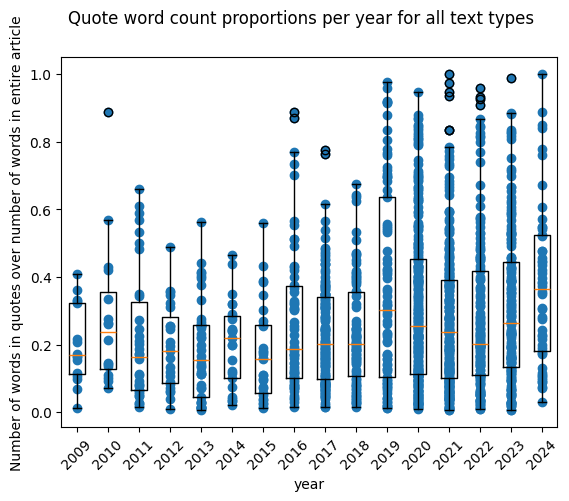

In [4]:
all_types_df = get_full_df("./output/quotes.xlsx")

plot_and_save_for_years(
    df=all_types_df, 
    title="Quote word count proportions per year for all text types",
    save_path="./visualization/quotes/all_types.png"
)

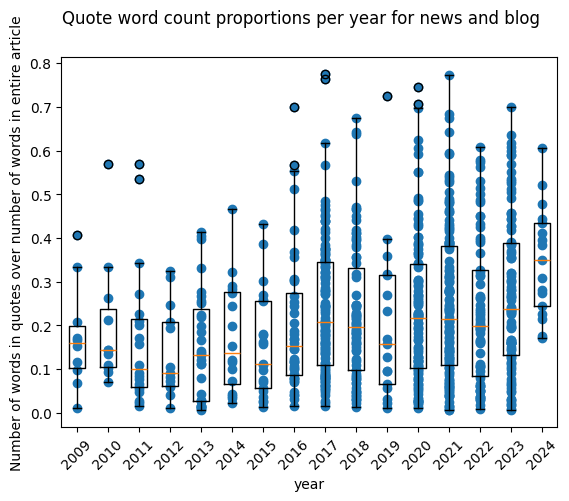

In [5]:
news_and_blog_df = get_full_df("./output/news_and_blog/quotes_news_and_blog.xlsx")

plot_and_save_for_years(
    df=news_and_blog_df, 
    title="Quote word count proportions per year for news and blog",
    save_path="./visualization/quotes/news_and_blog.png"
)

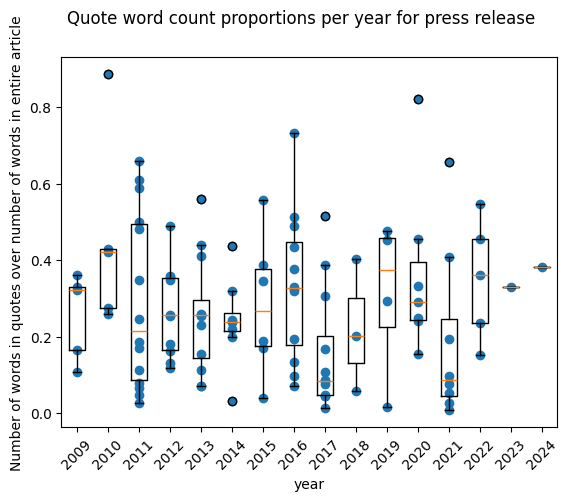

In [6]:
press_release_df = get_full_df("./output/press_release/quotes_press_release.xlsx")

plot_and_save_for_years(
    df=press_release_df, 
    title="Quote word count proportions per year for press release",
    save_path="./visualization/quotes/press_release.png"
)

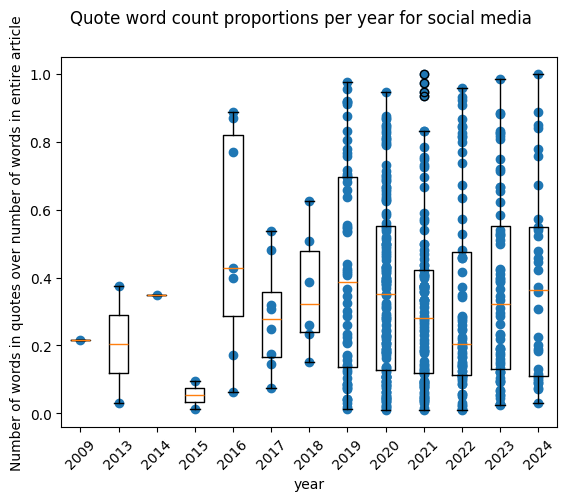

In [7]:
social_media_df = get_full_df("./output/social_media/quotes_social_media.xlsx")

plot_and_save_for_years(
    df=social_media_df, 
    title="Quote word count proportions per year for social media",
    save_path="./visualization/quotes/social_media.png"
)

Also plot the proportion of number of quotes to number of articles per year

In [ ]:
num_quotes_all_types_df = pd.read_excel(
    "./output/quotes.xlsx", 
    sheet_name="Num Quotes Proportions"
)
num_quotes_all_types_df

,year,proportion_num_quotes_to_num_articles
0,2009,6.176471
1,2010,4.217391
2,2011,3.954545
3,2012,5.714286
4,2013,3.327869
5,2014,3.911765
6,2015,3.714286
7,2016,3.252747
8,2017,2.910314
9,2018,3.491803


In [ ]:
num_quotes_news_and_blog_df = pd.read_excel(
    "./output/news_and_blog/quotes_news_and_blog.xlsx", 
    sheet_name="Num Quotes Proportions"
)
num_quotes_news_and_blog_df

,year,proportion_num_quotes_to_num_articles
0,2009,5.909091
1,2010,5.857143
2,2011,3.962963
3,2012,6.125000
4,2013,4.676471
5,2014,4.705882
6,2015,5.304348
7,2016,5.276596
8,2017,4.292857
9,2018,4.729412


In [ ]:
num_quotes_press_release_df = pd.read_excel(
    "./output/press_release/quotes_press_release.xlsx", 
    sheet_name="Num Quotes Proportions"
)
num_quotes_press_release_df

,year,proportion_num_quotes_to_num_articles
0,2009,5.400000
1,2010,1.875000
2,2011,3.941176
3,2012,5.166667
4,2013,2.470588
5,2014,4.727273
6,2015,3.857143
7,2016,2.928571
8,2017,2.166667
9,2018,2.428571


In [ ]:
num_quotes_social_media_df = pd.read_excel(
    "./output/social_media/quotes_social_media.xlsx", 
    sheet_name="Num Quotes Proportions"
)
num_quotes_social_media_df

,year,proportion_num_quotes_to_num_articles
0,2009,13.000000
1,2010,0.000000
2,2013,0.200000
3,2014,0.166667
4,2015,0.583333
5,2016,0.233333
6,2017,0.138462
7,2018,0.233333
8,2019,0.319231
9,2020,0.396631


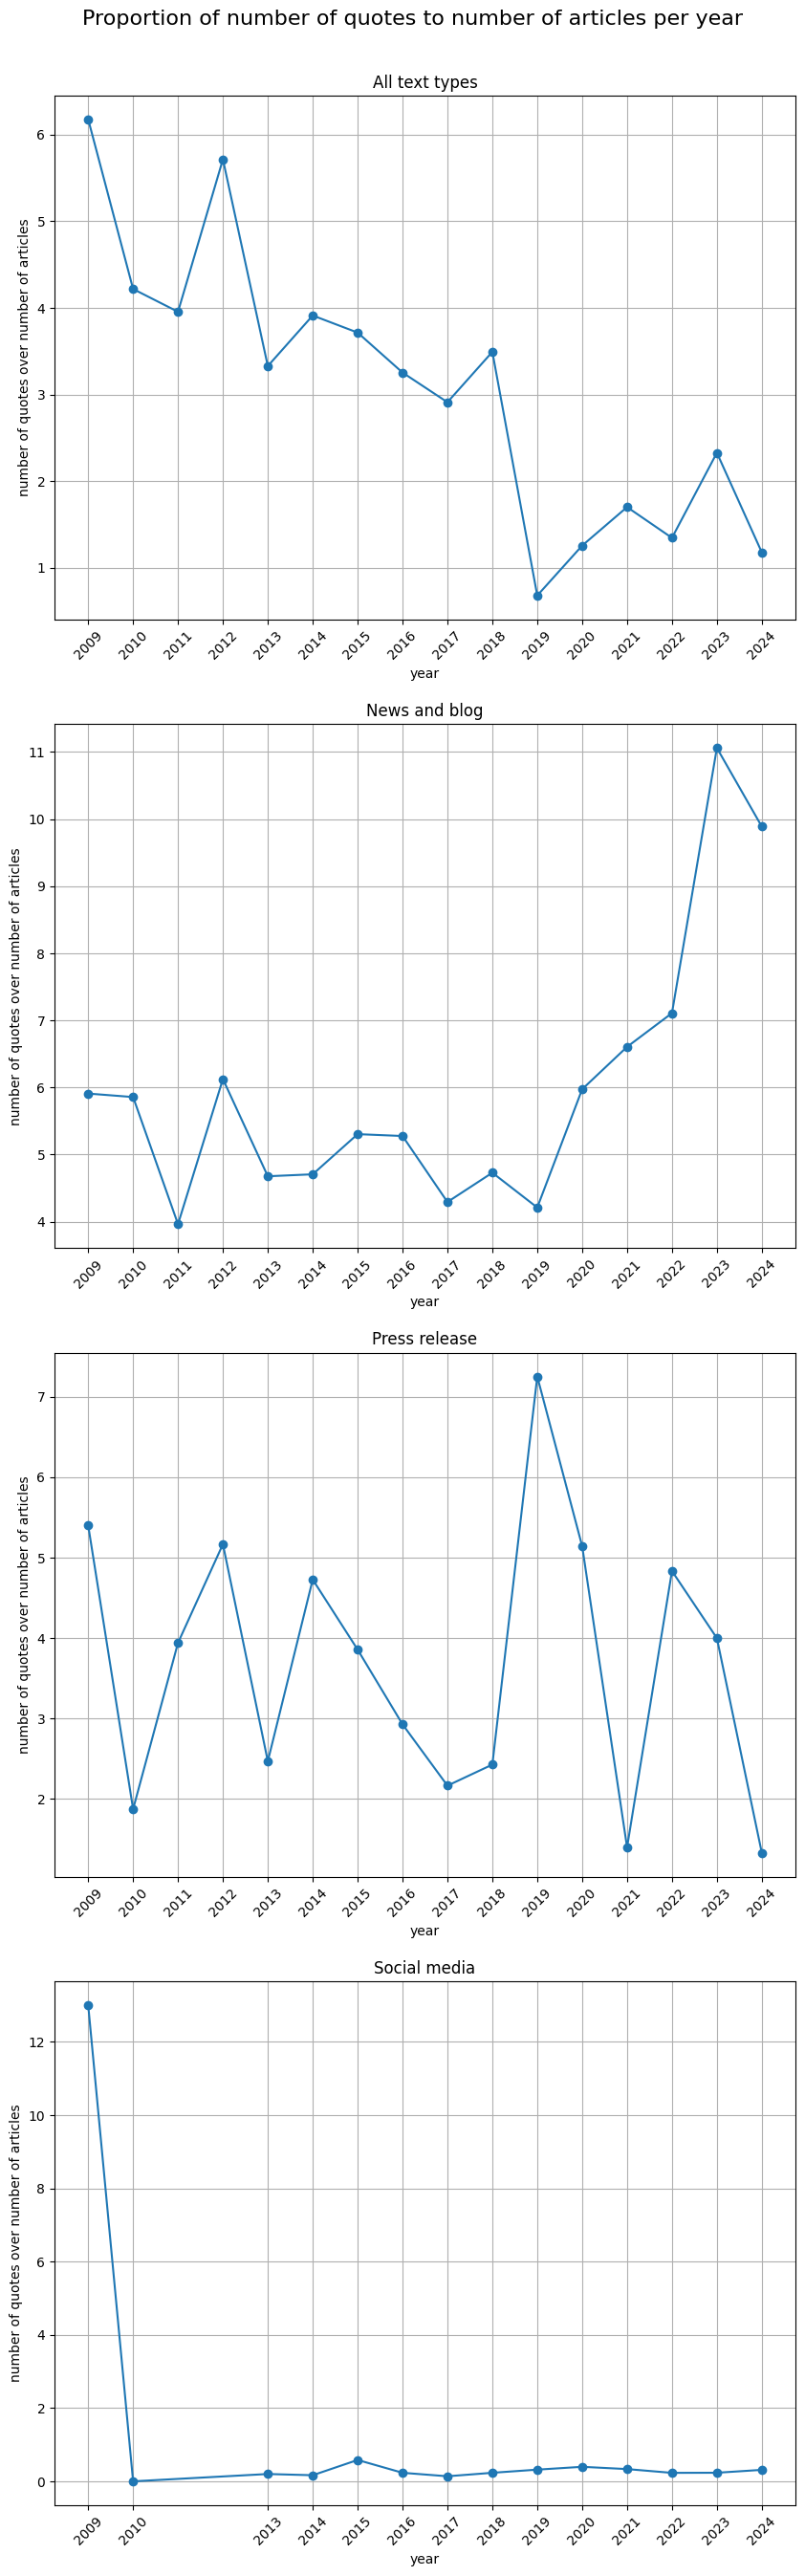

In [12]:
fig, axes = plt.subplots(
    nrows=4, 
    ncols=1, 
    figsize=(10, 30),
    squeeze=False
)

axes_flat: list[Axes] = axes.flatten()

fig.suptitle("Proportion of number of quotes to number of articles per year", fontsize=16)
fig.subplots_adjust(top=0.95)

def plot_data_on_ax(i: str, df: pd.DataFrame, title: str):
    years = list(df["year"])
    
    ax = axes_flat[i]

    ax.set_title(title)

    ax.set_xlabel("year")
    ax.grid(True)
    
    ax.set_xticks(list(years))
    ax.set_xticklabels([str(y) for y in years])
    ax.tick_params(axis="x", rotation=45)

    ax.set_ylabel("number of quotes over number of articles")

    ax.plot(years, df["proportion_num_quotes_to_num_articles"], marker="o")

plot_data_on_ax(0, num_quotes_all_types_df, "All text types")
plot_data_on_ax(1, num_quotes_news_and_blog_df, "News and blog")
plot_data_on_ax(2, num_quotes_press_release_df, "Press release")
plot_data_on_ax(3, num_quotes_social_media_df, "Social media")

fig.savefig("./visualization/quotes/num_quotes_lineplot.png")